### Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

##### Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [230]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import joblib

In [2]:

df =pd.read_csv('https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv?raw=true')

In [4]:
## checking for null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

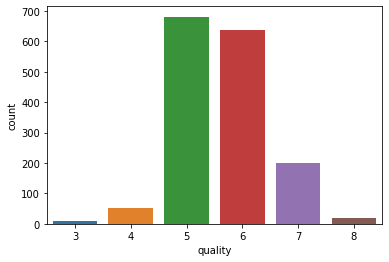

In [11]:

sns.countplot(df.quality)

In [22]:
### binning the target variable

bins = [0, 6, 10]

names = ['not good','good']

df['binned_data'] =pd.cut(df['quality'], bins, labels=names)

In [23]:
df[['quality','binned_data']][df['binned_data'] == 'good'].value_counts()

quality  binned_data
7        good           199
8        good            18
dtype: int64

In [24]:
df[['quality','binned_data']][df['binned_data'] == 'not good'].value_counts()

quality  binned_data
5        not good       681
6        not good       638
4        not good        53
3        not good        10
dtype: int64

In [25]:
df['binned_data'].value_counts()

not good    1382
good         217
Name: binned_data, dtype: int64

In [29]:
df.drop(columns=['quality'],axis=1,inplace=True)

### Observation

1.) As we can observe that there is class imbalance, we would be using smote to balance classes.

In [183]:
X = df.drop(columns=['binned_data'],axis=1)
y = df['binned_data']

Counter(y)

oversample = SMOTE()
X_sm,y_sm = oversample.fit_resample(X,y)

Counter(y_sm)

Counter({'not good': 1382, 'good': 1382})

In [65]:
X_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2759,7.793351,0.615398,0.138565,5.833772,0.131157,5.000000,10.933509,0.998320,3.362021,0.715932,10.086702
2760,6.800000,0.360000,0.320000,1.800000,0.067000,4.000000,8.000000,0.992800,3.360000,0.550000,12.800000
2761,7.478218,0.560068,0.227599,2.409777,0.067233,30.353341,48.000000,0.995244,3.410223,0.735644,12.354889
2762,7.155640,0.689981,0.075564,2.491635,0.077556,16.305450,33.305450,0.996792,3.580000,0.751090,11.258175


In [36]:
y_sm.value_counts()

not good    1382
good        1382
Name: binned_data, dtype: int64

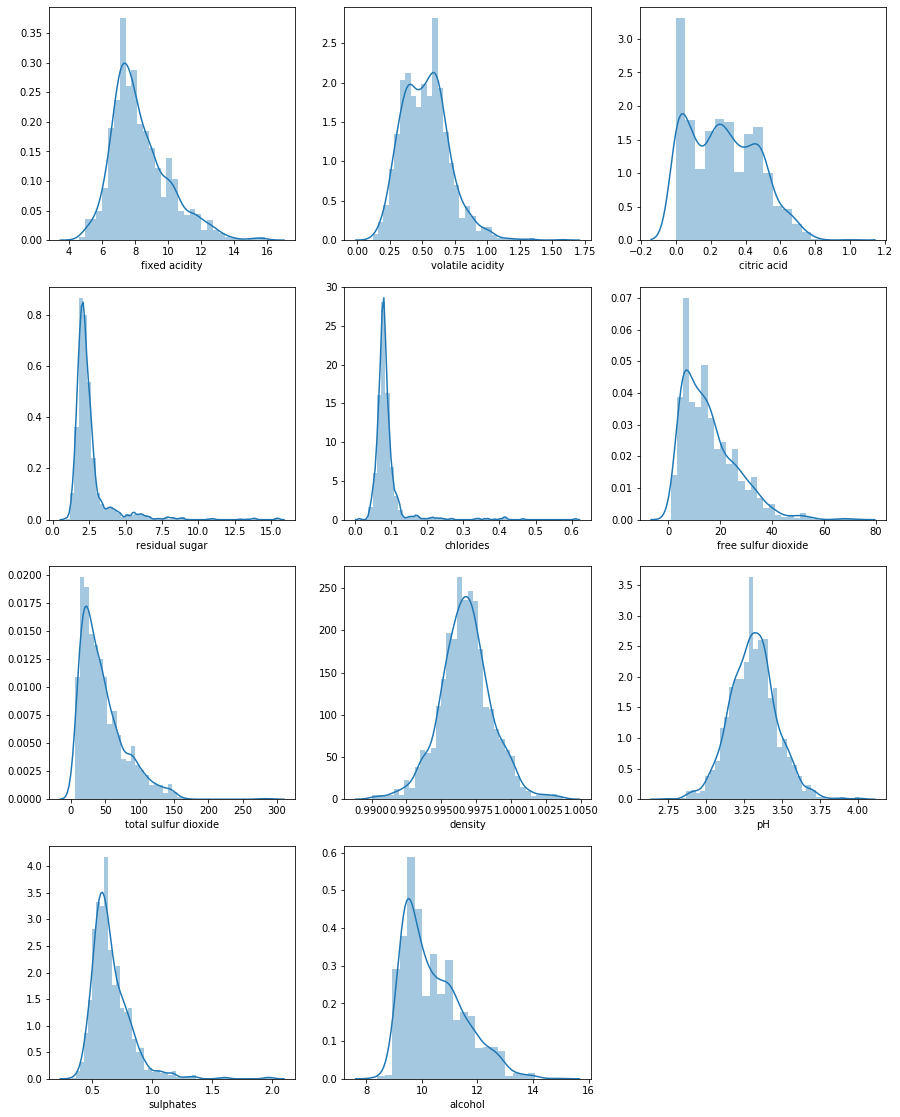

In [40]:
## checking the data distribution
plt.figure(figsize= (15,30))

for i in enumerate(df.drop(columns=['binned_data']).columns):
    plt.subplot(6,3,i[0] + 1)
    sns.distplot(df[i[1]])

In [41]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

### Observation
1.) we can observe skewness in some columns


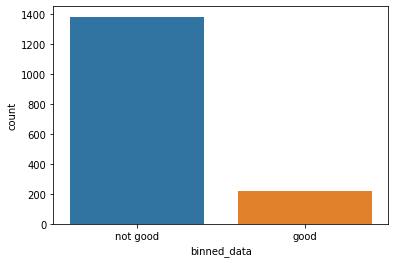

In [45]:
sns.countplot(df['binned_data'])

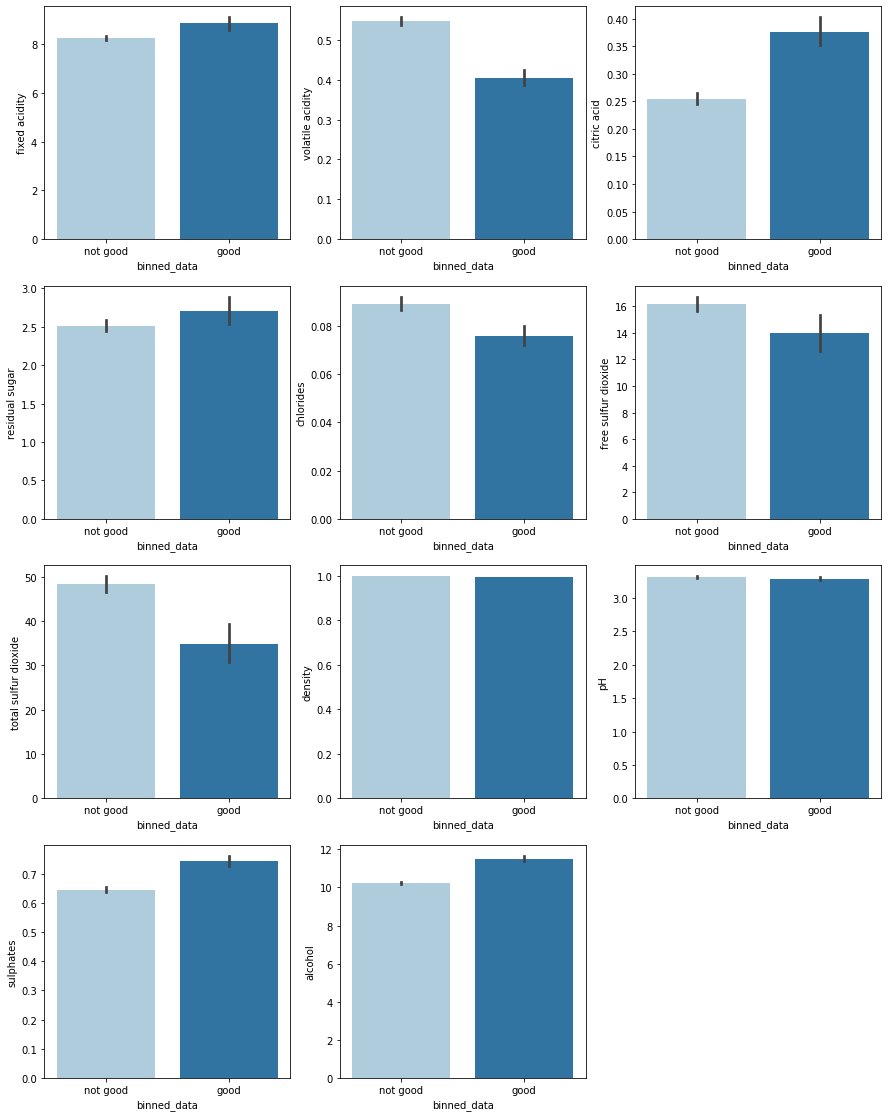

In [61]:
## checking the data distribution
plt.figure(figsize= (15,30))

for i in enumerate(df.drop(columns=['binned_data']).columns):
    plt.subplot(6,3,i[0] + 1)
    sns.barplot(df['binned_data'],df[i[1]],orient='v',palette='Paired')
    

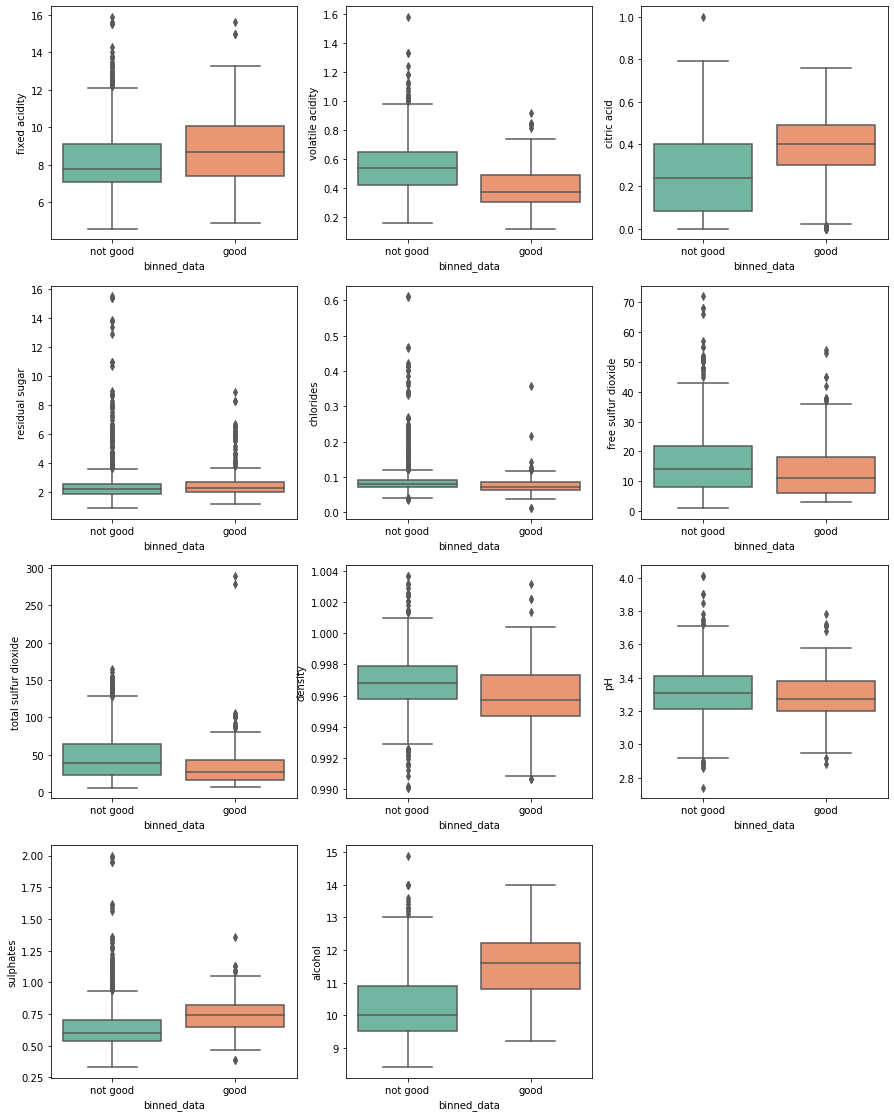

In [58]:
### checking box plot of features with target column

    
plt.figure(figsize= (15,30))

for i in enumerate(df.drop(columns=['binned_data']).columns):
    plt.subplot(6,3,i[0] + 1)
    sns.boxplot(df['binned_data'],df[i[1]],orient='v',palette='Set2')

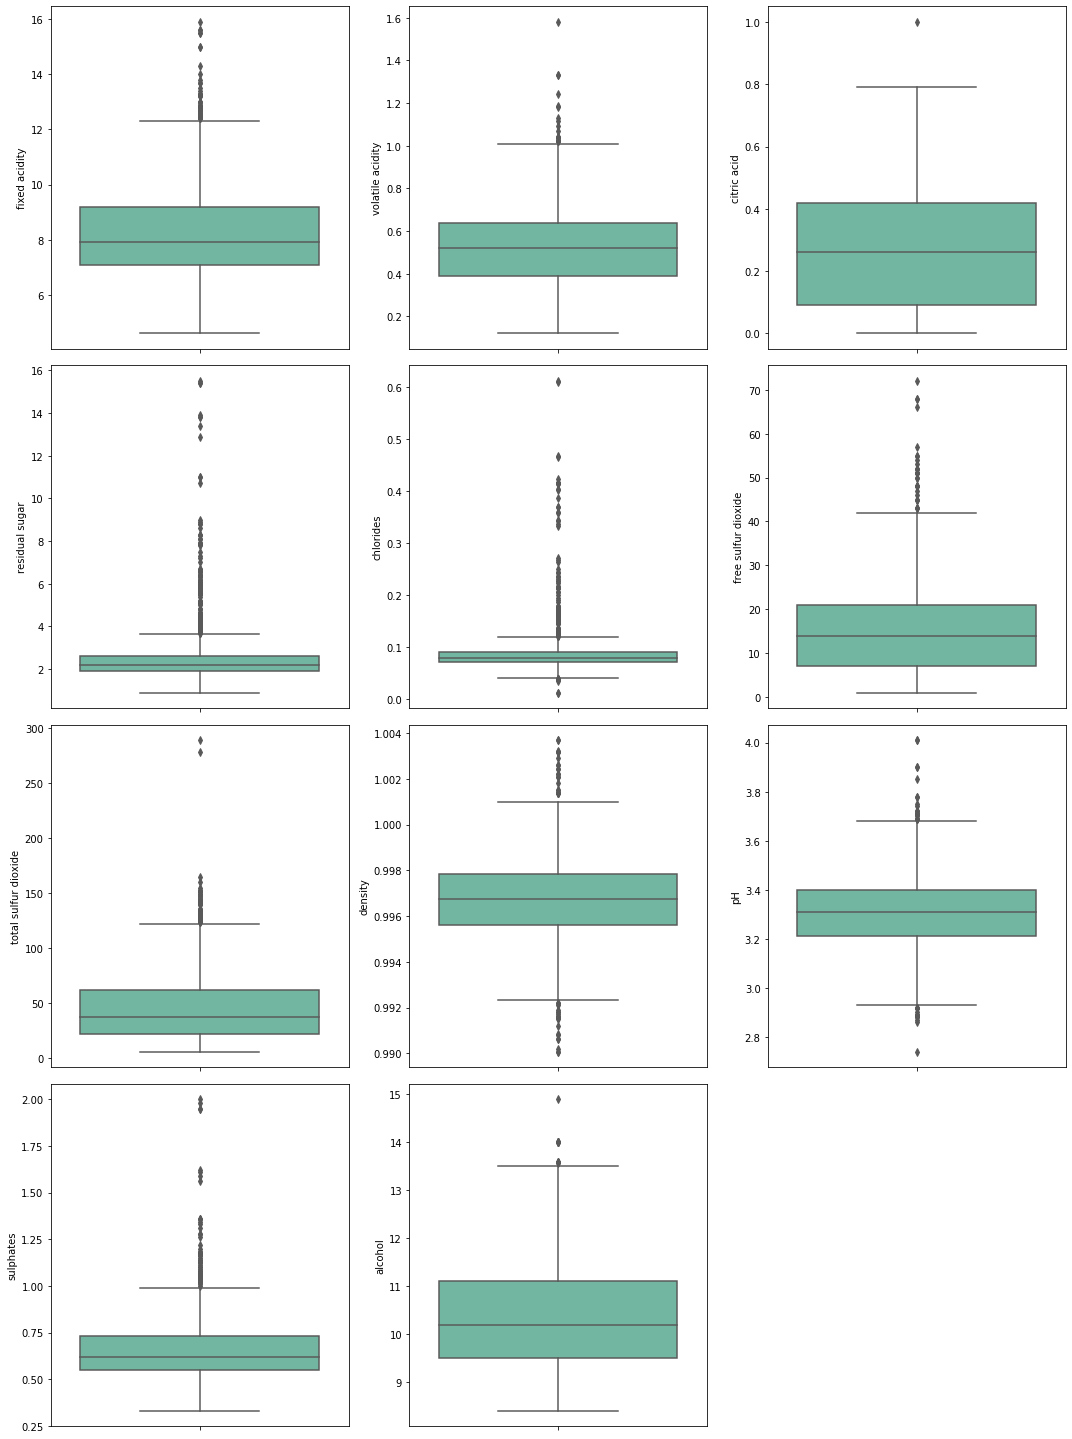

In [64]:
## box plot to check for outliers

plt.figure(figsize= (15,30))


for i,el in enumerate(df._get_numeric_data().columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

### Observation
1.) we can observe lot of outliers in the dataset, which needs to be removed

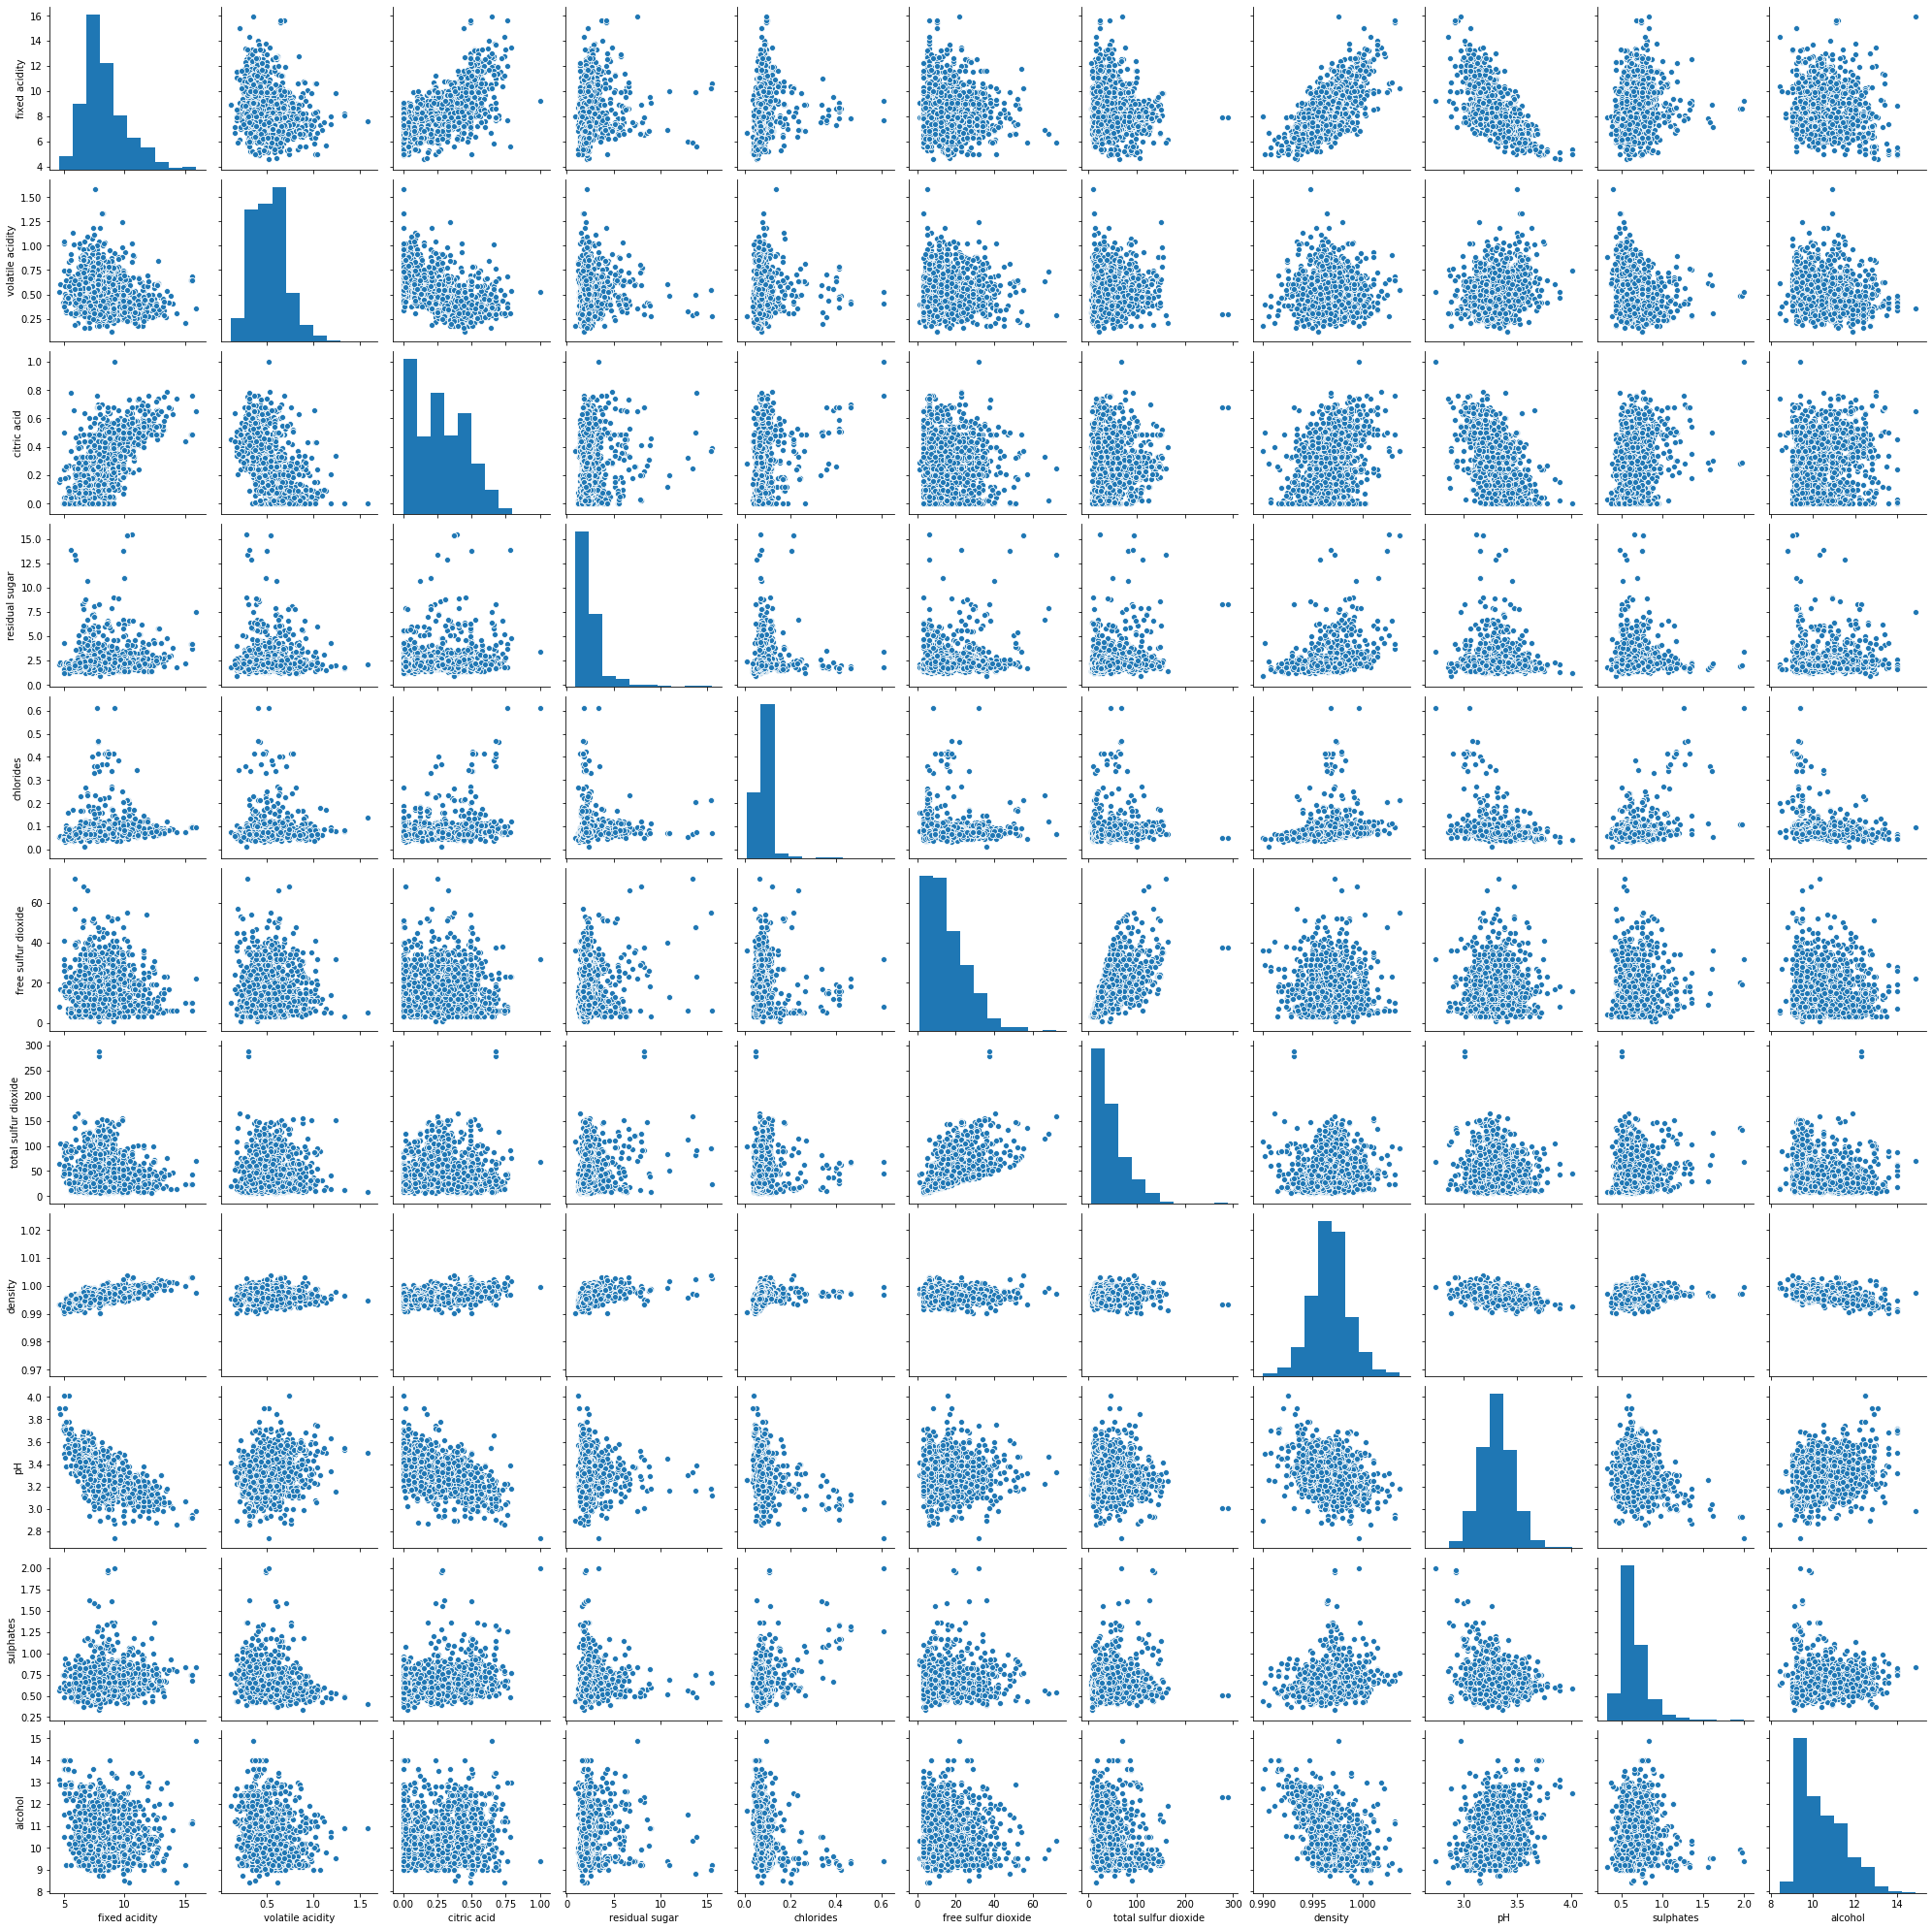

In [63]:
sns.pairplot(df)

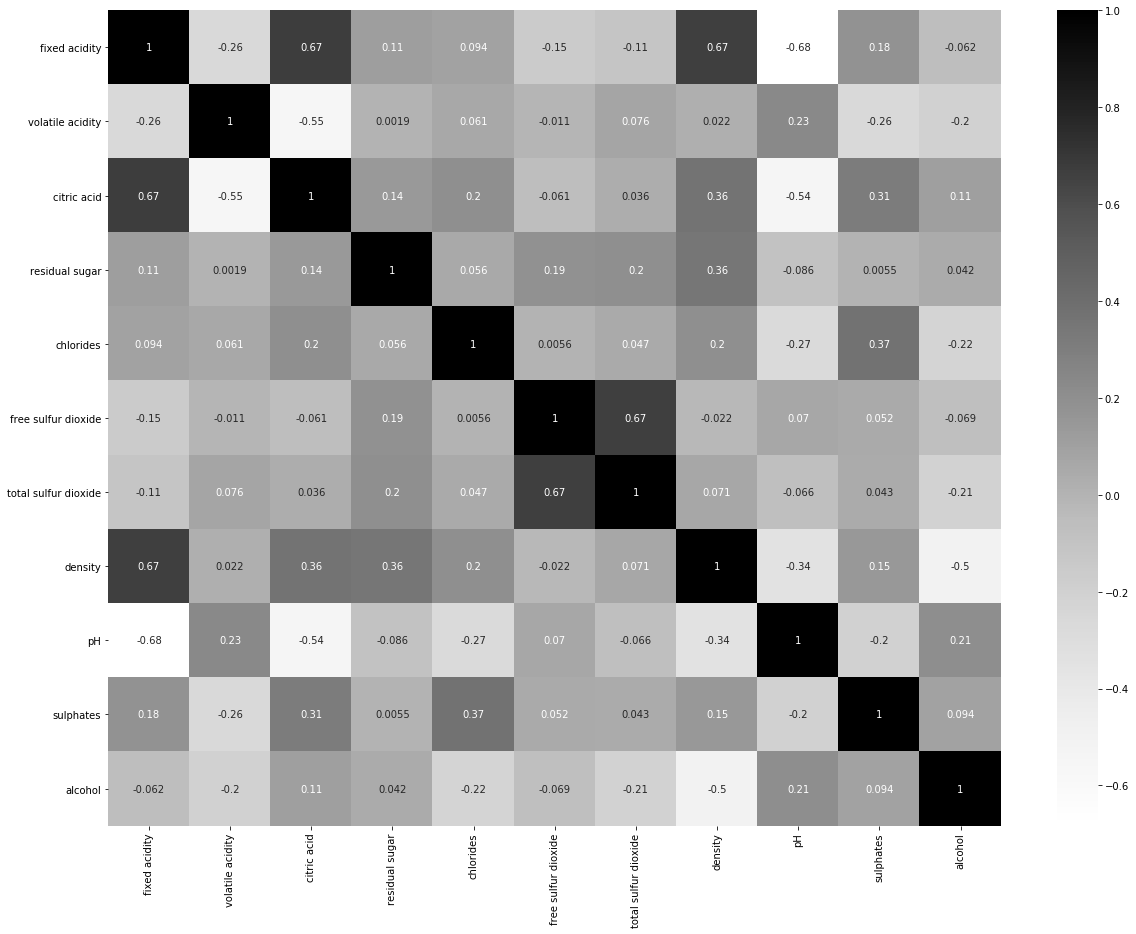

In [67]:
### checking the correlation

plt.rcParams['figure.figsize'] = (20, 15)
corr = df.corr()

sns.heatmap(corr,cmap='Greys' ,annot=True)

In [69]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df.drop(columns=['binned_data'])
  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


#### Checking the columns with observed multicolinearity

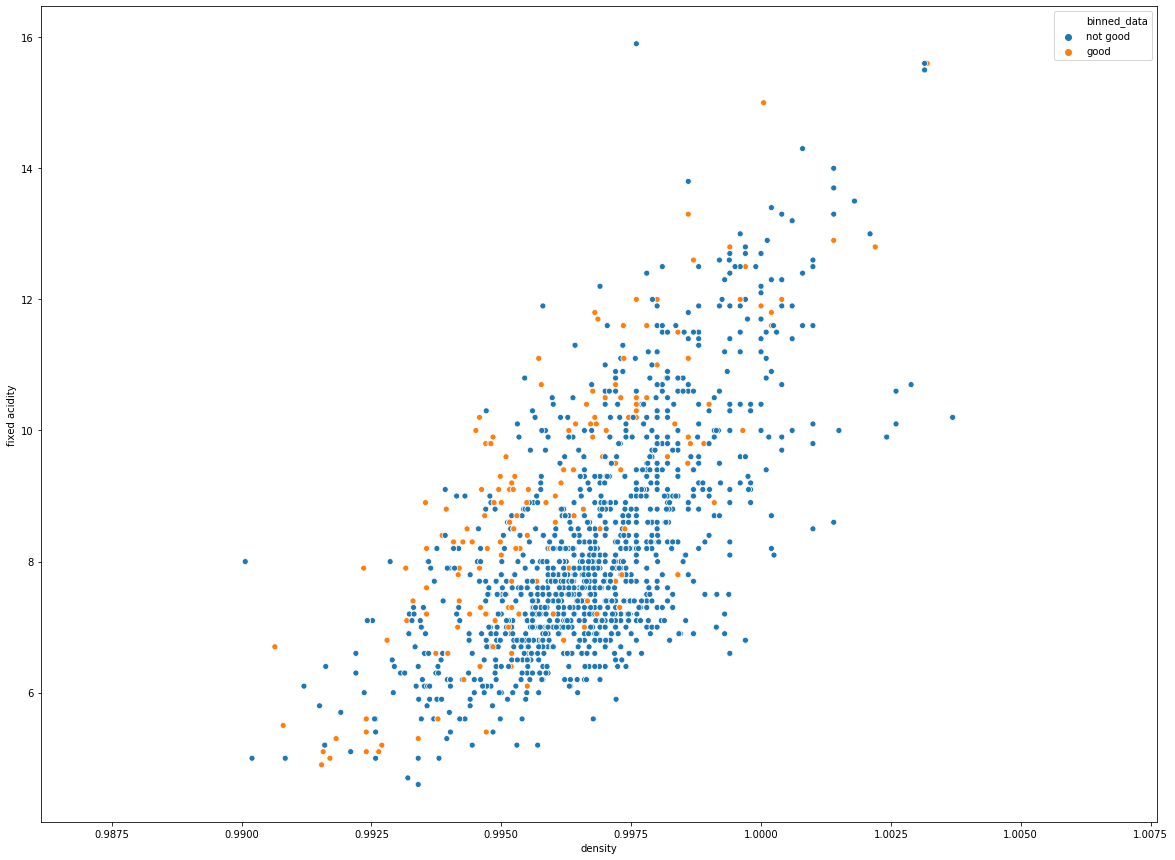

In [76]:
sns.scatterplot(df['density'],df['fixed acidity'],hue=df['binned_data'])

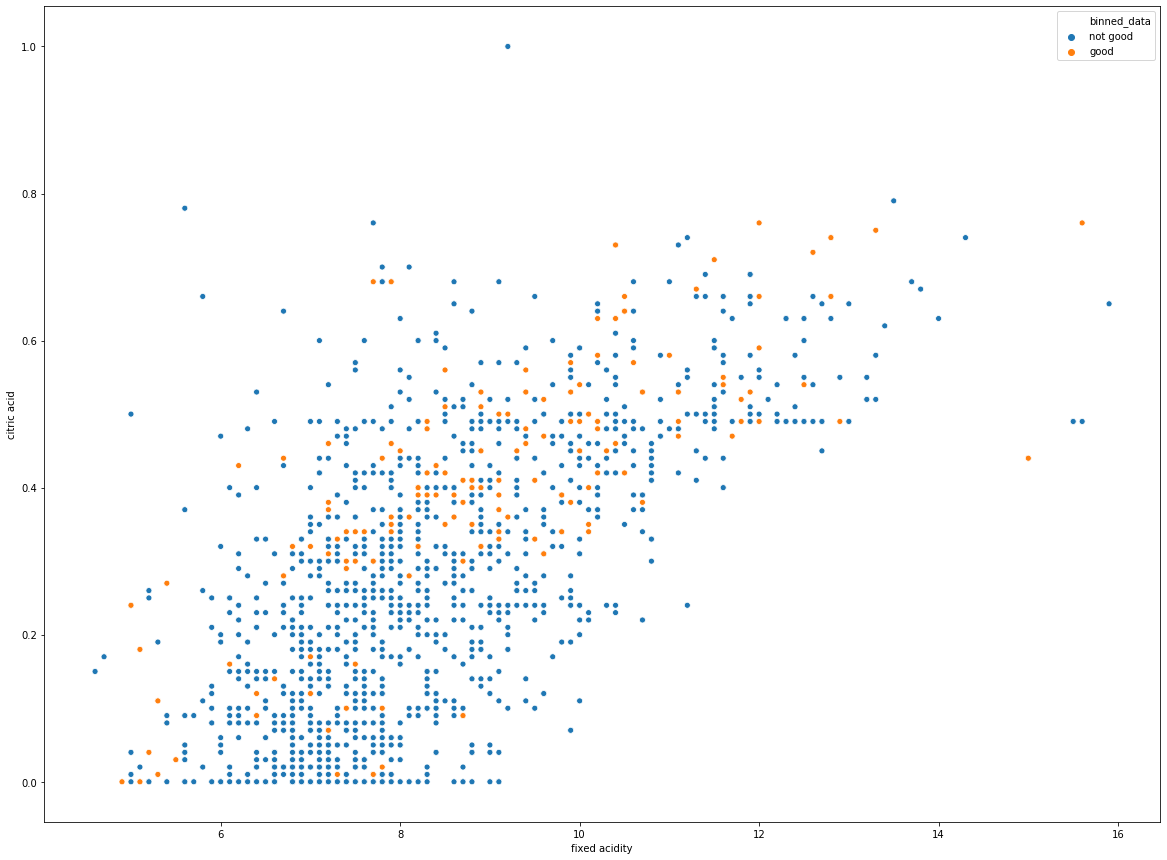

In [74]:
sns.scatterplot(df['fixed acidity'],df['citric acid'],hue=df['binned_data'])

In [79]:
len(X_sm),len(y_sm)

(2764, 2764)

### Data Cleaning

##### Removing Outliers

In [200]:
df_sm = pd.concat([X_sm,y_sm],axis = 1)

In [201]:
df_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,binned_data
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,not good
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,not good
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,not good
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,not good
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,not good
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,9.216241,0.251292,0.365831,1.987084,0.072550,44.612530,67.904098,0.997279,3.380588,0.830294,10.406651,good
2760,7.562170,0.711671,0.018739,2.411730,0.073774,9.873900,14.126100,0.995350,3.489824,0.693607,11.611730,good
2761,9.094116,0.292648,0.332059,2.054413,0.063147,12.970580,27.029420,0.995151,3.260294,0.837352,11.726478,good
2762,10.500000,0.240000,0.464778,2.068669,0.067149,6.000000,23.791126,0.997779,3.156266,0.915666,10.979113,good


In [202]:
labelEncoder = LabelEncoder()
df_sm['binned_data'] = labelEncoder.fit_transform(df_sm['binned_data'])

In [204]:
df_sm['binned_data'].value_counts()

0    1382
1    1382
Name: binned_data, dtype: int64

In [205]:
z = np.abs(zscore(df_sm._get_numeric_data()))
threshold=3
np.where(z>3)

(array([  13,   14,   14,   15,   15,   17,   17,   19,   33,   38,   42,
          43,   45,   57,   81,   81,   83,   86,   88,   90,   91,   92,
          94,   94,   95,  106,  106,  109,  120,  126,  127,  134,  145,
         147,  151,  151,  151,  151,  163,  164,  169,  169,  181,  188,
         189,  199,  201,  219,  226,  226,  234,  239,  240,  243,  244,
         258,  258,  274,  281,  291,  307,  308,  324,  325,  339,  340,
         354,  374,  396,  396,  400,  400,  413,  415,  442,  442,  451,
         480,  480,  494,  501,  502,  515,  522,  523,  544,  544,  553,
         554,  554,  555,  555,  557,  557,  566,  567,  568,  584,  591,
         595,  608,  614,  636,  637,  639,  649,  649,  651,  652,  652,
         652,  666,  672,  672,  684,  684,  690,  692,  692,  695,  700,
         705,  710,  723,  724,  730,  741,  754,  756,  771,  772,  775,
         776,  777,  795,  861,  889,  889,  899,  911,  917,  923,  925,
         926,  982, 1012, 1017, 1018, 

In [206]:

df_sm =df_sm[(z<3).all(axis=1)]

In [207]:
df_sm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,binned_data
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,1
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,1
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2759,9.216241,0.251292,0.365831,1.987084,0.072550,44.612530,67.904098,0.997279,3.380588,0.830294,10.406651,0
2760,7.562170,0.711671,0.018739,2.411730,0.073774,9.873900,14.126100,0.995350,3.489824,0.693607,11.611730,0
2761,9.094116,0.292648,0.332059,2.054413,0.063147,12.970580,27.029420,0.995151,3.260294,0.837352,11.726478,0
2762,10.500000,0.240000,0.464778,2.068669,0.067149,6.000000,23.791126,0.997779,3.156266,0.915666,10.979113,0


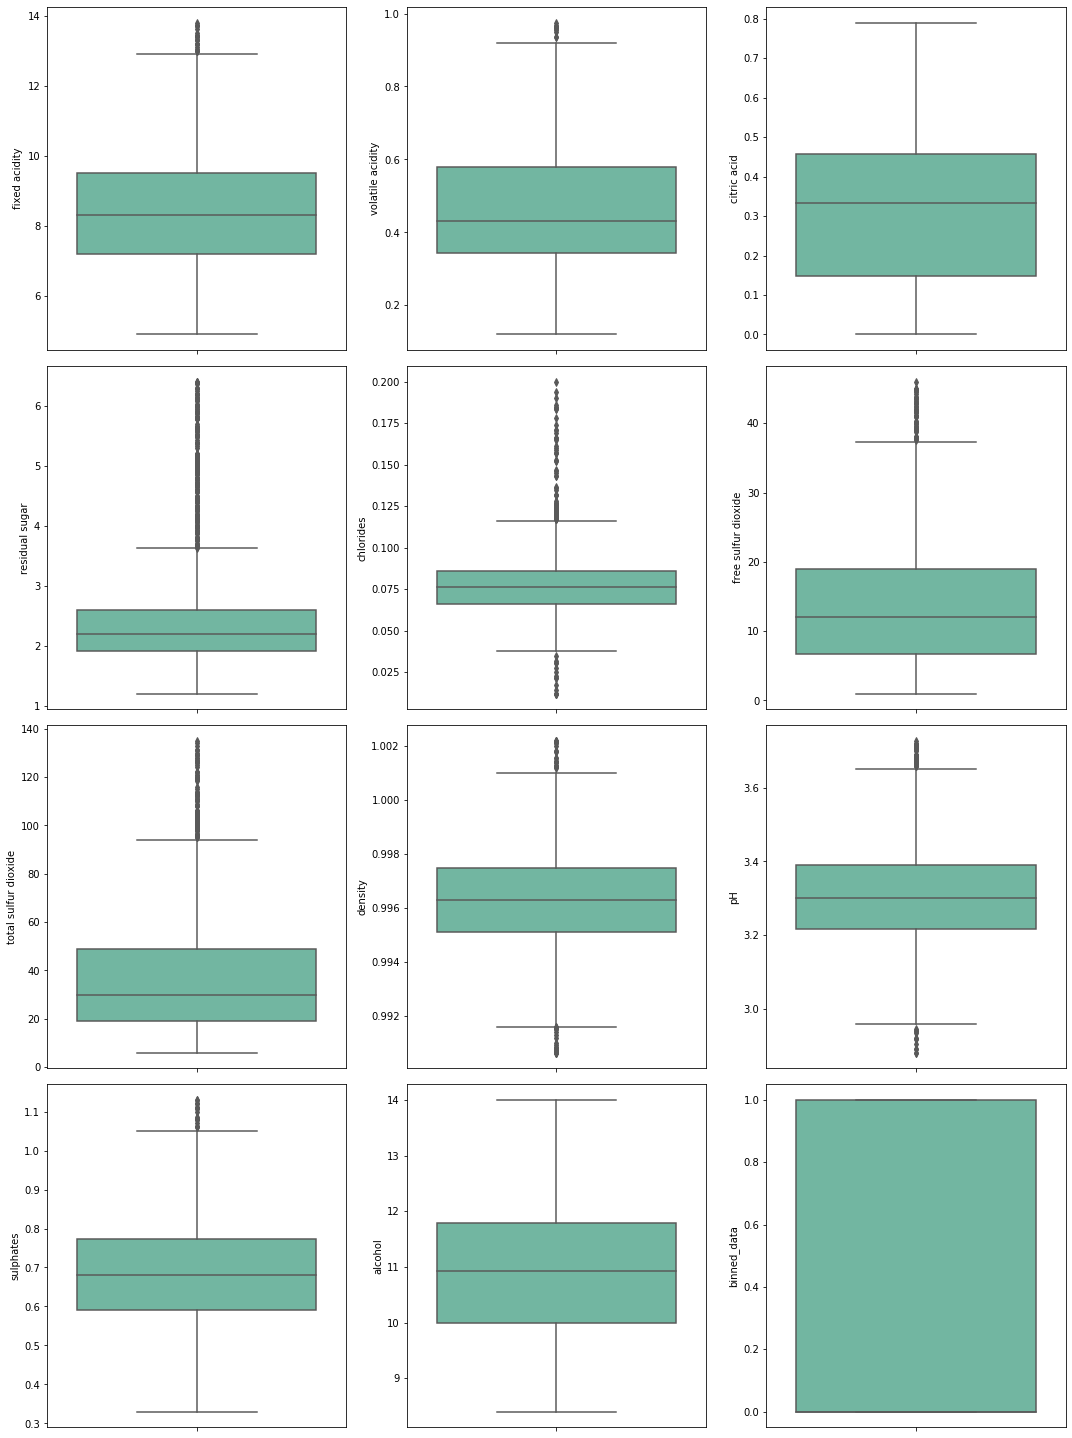

In [208]:
plt.figure(figsize= (15,30))


for i,el in enumerate(df_sm._get_numeric_data().columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df_sm,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

In [209]:
Q1 = df_sm.quantile(0.25)
Q3 = df_sm.quantile(0.75)
IQR = Q3 - Q1

df_new= df_sm[~((df_sm < (Q1 - 1.5 * IQR)) |(df_sm > (Q3 + 1.5 * IQR))).any(axis=1)]

In [211]:
len(df_sm),len(df_new)

(2546, 1988)

In [212]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,binned_data
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,1
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,1
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,1
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,1
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2758,9.900000,0.402508,0.435425,1.762539,0.068210,30.708290,48.458550,0.996859,3.239580,0.802497,10.891710,0
2760,7.562170,0.711671,0.018739,2.411730,0.073774,9.873900,14.126100,0.995350,3.489824,0.693607,11.611730,0
2761,9.094116,0.292648,0.332059,2.054413,0.063147,12.970580,27.029420,0.995151,3.260294,0.837352,11.726478,0
2762,10.500000,0.240000,0.464778,2.068669,0.067149,6.000000,23.791126,0.997779,3.156266,0.915666,10.979113,0


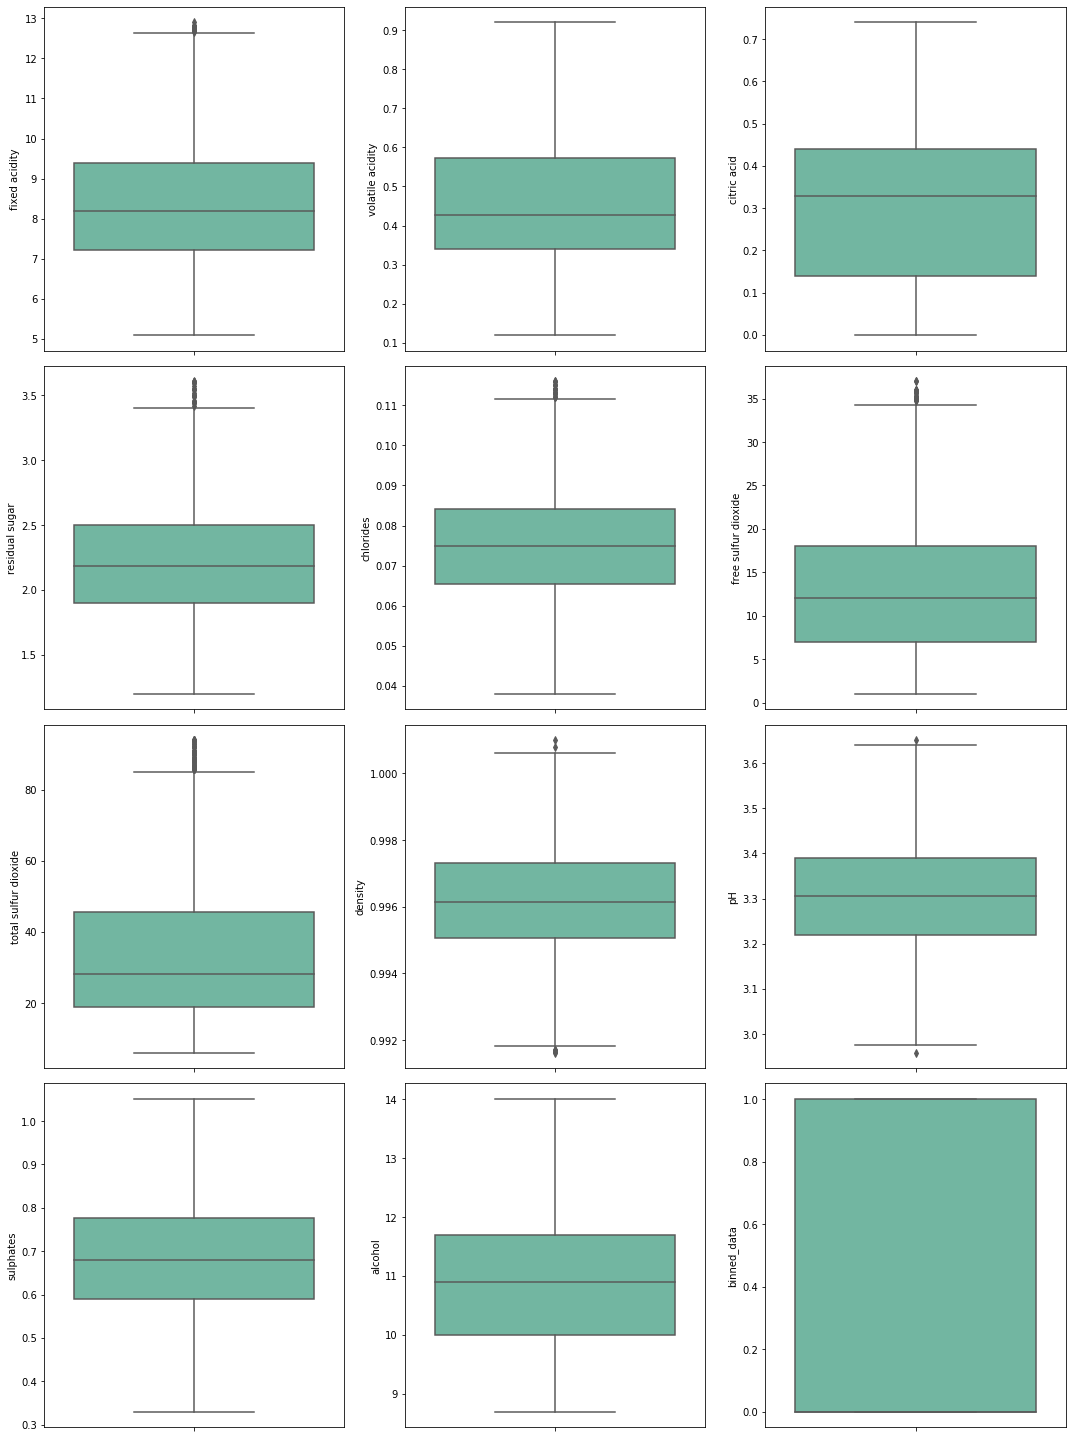

In [213]:
plt.figure(figsize= (15,30))


for i,el in enumerate(df_new.columns):
    plt.subplot(6,3,i + 1)
    sns.boxplot(y=el,data=df_new,palette='Set2')
                
                

plt.tight_layout() 

plt.show()

### Observation
1.) Now we can observe that all the outliers are removed from the dataset

### Power Transform to remove skewness and scaling

In [214]:
import warnings
warnings.filterwarnings('ignore')

power = PowerTransformer()
for i in df_new.columns:
    if np.abs(df_new[i].skew()) > 0.5:
        df_new[[i]] = power.fit_transform(df_new[[i]])
        
        


In [215]:
print(df.skew())
print('*' * 60)
print(df_new.skew())

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64
************************************************************
fixed acidity           0.005123
volatile acidity        0.034879
citric acid            -0.102005
residual sugar          0.000289
chlorides               0.224517
free sulfur dioxide    -0.016902
total sulfur dioxide   -0.010709
density                 0.130086
pH                      0.140179
sulphates               0.224563
alcohol                 0.213804
binned_data             0.076572
dtype: float64


### Observation
1. We can observe that skewness is removed from the dataset

In [218]:
## scaling the dataset

X = df_sm.drop(columns=['binned_data'])
y = df_sm['binned_data']

scale = StandardScaler()
scaled_data = scale.fit_transform(X)

In [221]:
df_scaled = pd.DataFrame(scaled_data,columns=df_new.drop(columns=['binned_data']).columns)

In [222]:
df_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03,2.546000e+03
mean,-1.027610e-15,-1.732053e-16,1.667951e-16,4.727380e-16,1.197709e-16,-2.686164e-17,-1.036964e-16,-1.649375e-14,2.243165e-15,7.076445e-16,-9.040948e-16
std,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00,1.000196e+00
min,-2.134751e+00,-2.212457e+00,-1.655965e+00,-1.371751e+00,-3.435899e+00,-1.454833e+00,-1.238106e+00,-3.055531e+00,-3.099129e+00,-2.758078e+00,-2.272483e+00
25%,-7.714025e-01,-7.759745e-01,-8.691394e-01,-5.925630e-01,-6.076965e-01,-8.365768e-01,-7.395882e-01,-6.511184e-01,-6.600690e-01,-7.582226e-01,-8.381066e-01
50%,-1.231700e-01,-2.210804e-01,1.078126e-01,-2.820556e-01,-9.272183e-02,-2.634606e-01,-3.177658e-01,-2.193706e-02,-4.428905e-02,-6.596508e-02,-1.109272e-02
75%,5.951393e-01,7.386954e-01,7.803582e-01,1.538228e-01,4.382702e-01,4.946859e-01,4.108366e-01,6.099604e-01,6.103195e-01,6.595748e-01,7.592124e-01
max,3.130858e+00,3.279887e+00,2.542242e+00,4.294667e+00,6.384684e+00,3.418965e+00,3.708721e+00,3.139932e+00,3.070365e+00,3.395323e+00,2.747834e+00


In [224]:
len(scaled_data),len(y)

(2546, 2546)

### Feature Importance

In [225]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, y, random_state=44, test_size=0.2)

In [231]:
y_train

2562    0
2234    0
326     0
1477    0
2226    0
       ..
104     1
2349    0
659     1
1348    1
2005    0
Name: binned_data, Length: 2036, dtype: int32

In [228]:
### Checking Feature importance



from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

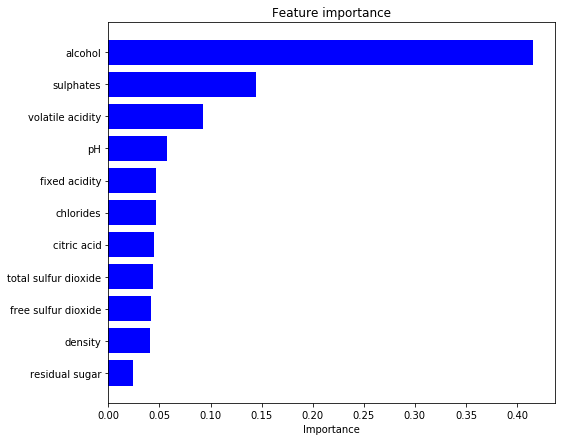

In [229]:
features_list = X.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="blue")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.show()

### Model Development

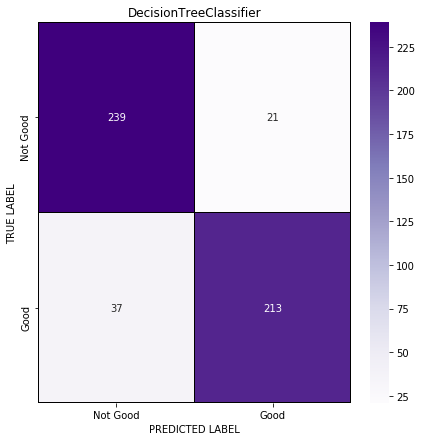

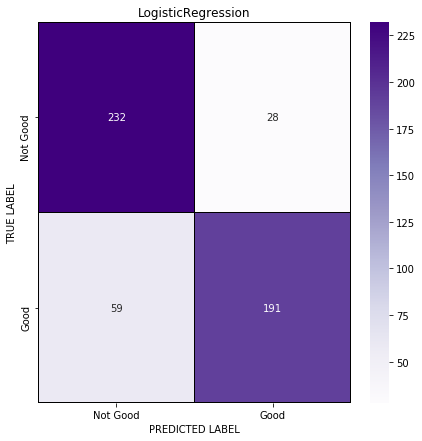

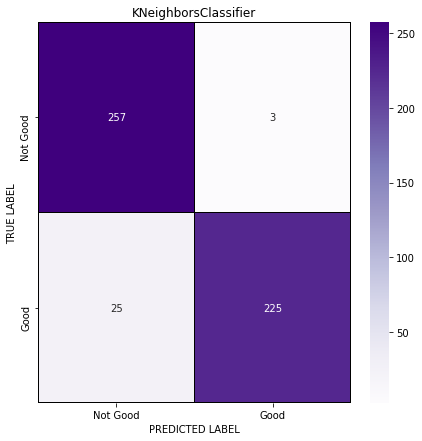

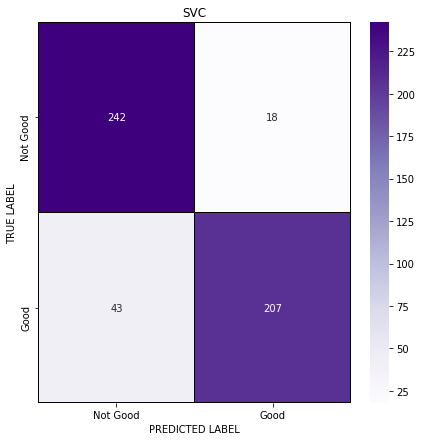

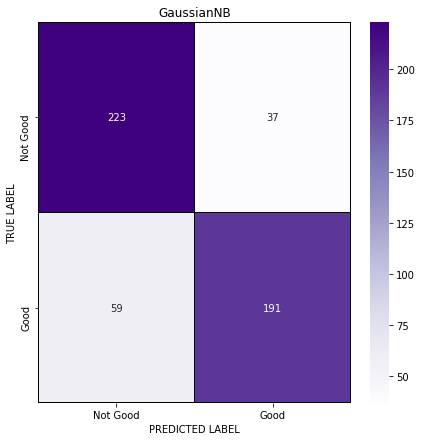

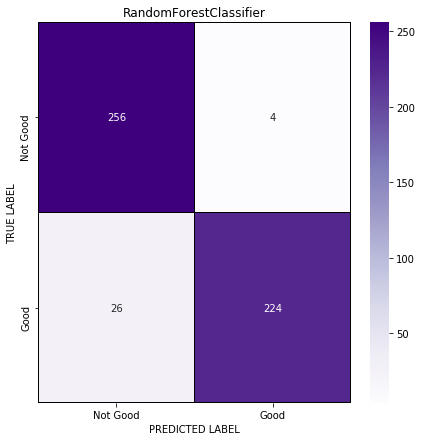

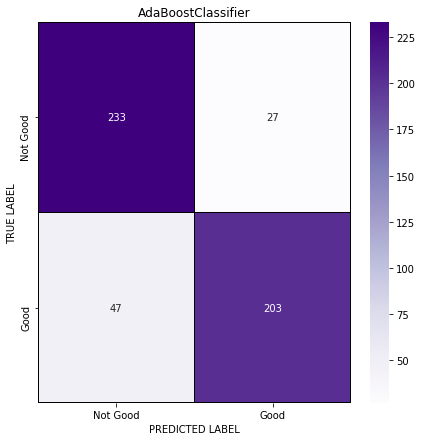

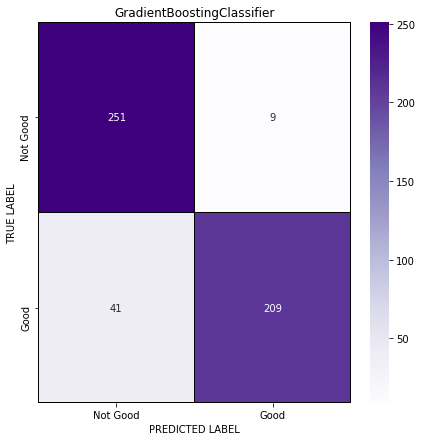

[22:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

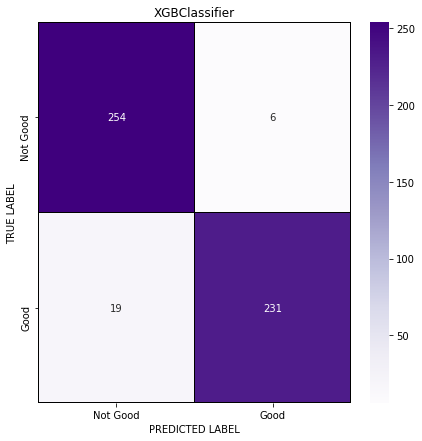

In [232]:

model_list = [
    DecisionTreeClassifier(),
    LogisticRegression(solver="lbfgs", max_iter=500),
    KNeighborsClassifier(n_neighbors=1),
    SVC(random_state=42, gamma="auto"),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    XGBClassifier()
]

index_list = ['DT','LR','KNN','SVC','NB','RF','ADB','GBC','XGB']

def best_fit_model(models,x_train,x_test,y_train,_y_test):
    accuracy_scores = []
    cv_scores= []
    roc_auc_scores = []
   
    for m in models:
        m.fit(x_train,y_train)
        y_pred = m.predict(x_test)
        accuracy_scores.append(accuracy_score(y_test,y_pred))
        cv_scores.append(np.mean(cross_val_score(m,X,y,cv=5,scoring='accuracy')))
        roc_auc_scores.append(roc_auc_score(y_test,y_pred))
        cm = confusion_matrix(y_test, y_pred)
        x_axis_labels = ["Not Good", "Good"]
        y_axis_labels = ["Not Good", "Good"]
        f, ax = plt.subplots(figsize =(7,7))
        sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)    
        plt.xlabel("PREDICTED LABEL")
        plt.ylabel("TRUE LABEL")
        plt.title(str(m).split('(')[0]);
        plt.show()
    df = pd.DataFrame(list(zip(accuracy_scores,cv_scores,roc_auc_scores)),index=index_list,columns=['Accuracy','CV_Score','ROC_AUC_SCORE'])
    df['Score_Diff'] = df['Accuracy'] - df['CV_Score']
    return df

best_df =best_fit_model(model_list,x_train,x_test,y_train,y_test)

In [233]:
best_df

,Accuracy,CV_Score,ROC_AUC_SCORE,Score_Diff
DT,0.886275,0.857030,0.885615,0.029245
LR,0.829412,0.811834,0.828154,0.017578
KNN,0.945098,0.884110,0.944231,0.060988
SVC,0.880392,0.884106,0.879385,-0.003714
NB,0.811765,0.787489,0.810846,0.024276
RF,0.941176,0.898249,0.940308,0.042928
ADB,0.854902,0.848777,0.854077,0.006125
GBC,0.901961,0.881762,0.900692,0.020199
XGB,0.950980,0.901792,0.950462,0.049188


### Observation

1.) As we can observe the Random Forest and XGB boost regressor has best scores

### Random Forest Hyper Parameter Tuning

In [240]:
grid = {

'max_depth': [10, 20, 30, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10],
'n_estimators': [100, 200, 300, 400]
}

rf = RandomForestClassifier() #creating base model

grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X, y) 


In [243]:
grid_result.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

accuracy score : 0.9411764705882353
Cross val score : 0.9006055703224314
Roc_Auc_Score 0.9403846153846153


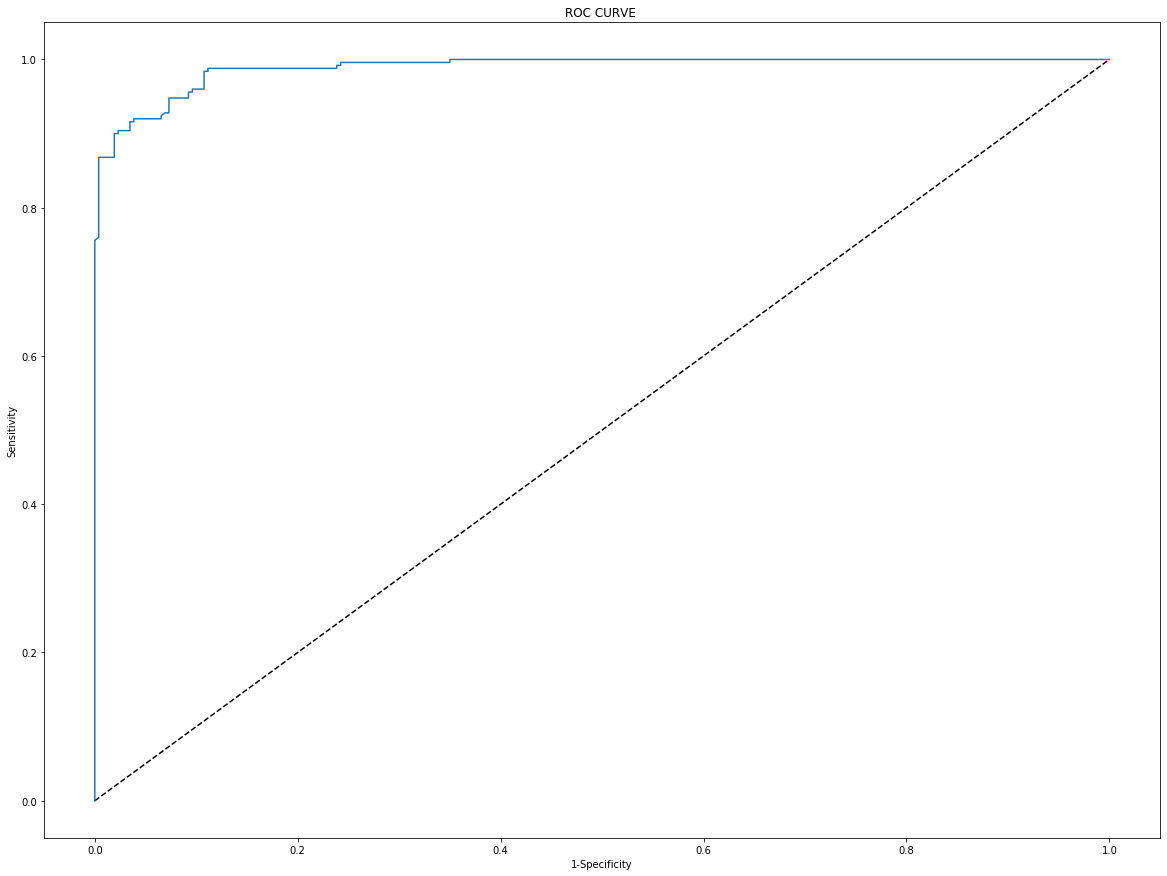

In [257]:
rf = RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=400)

rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(f'accuracy score : {accuracy_score(y_test,pred)}')
print('Cross val score :',np.mean(cross_val_score(rf,X,y,cv=5,scoring='accuracy')))


rf_proba = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,rf_proba)      
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROC CURVE ')
print('Roc_Auc_Score',roc_auc_score(y_test,pred))

### XGBoost Classifier Hyper Tuning

In [246]:
param_test2b = {
 'min_child_weight':[6,8,10,12]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4, cv=5)
gsearch.fit(X,y)

[22:41:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=4, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_method=

In [248]:
gsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

[22:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score : 0.9196078431372549
[22:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:45] WARNING: C:/Users/Admin

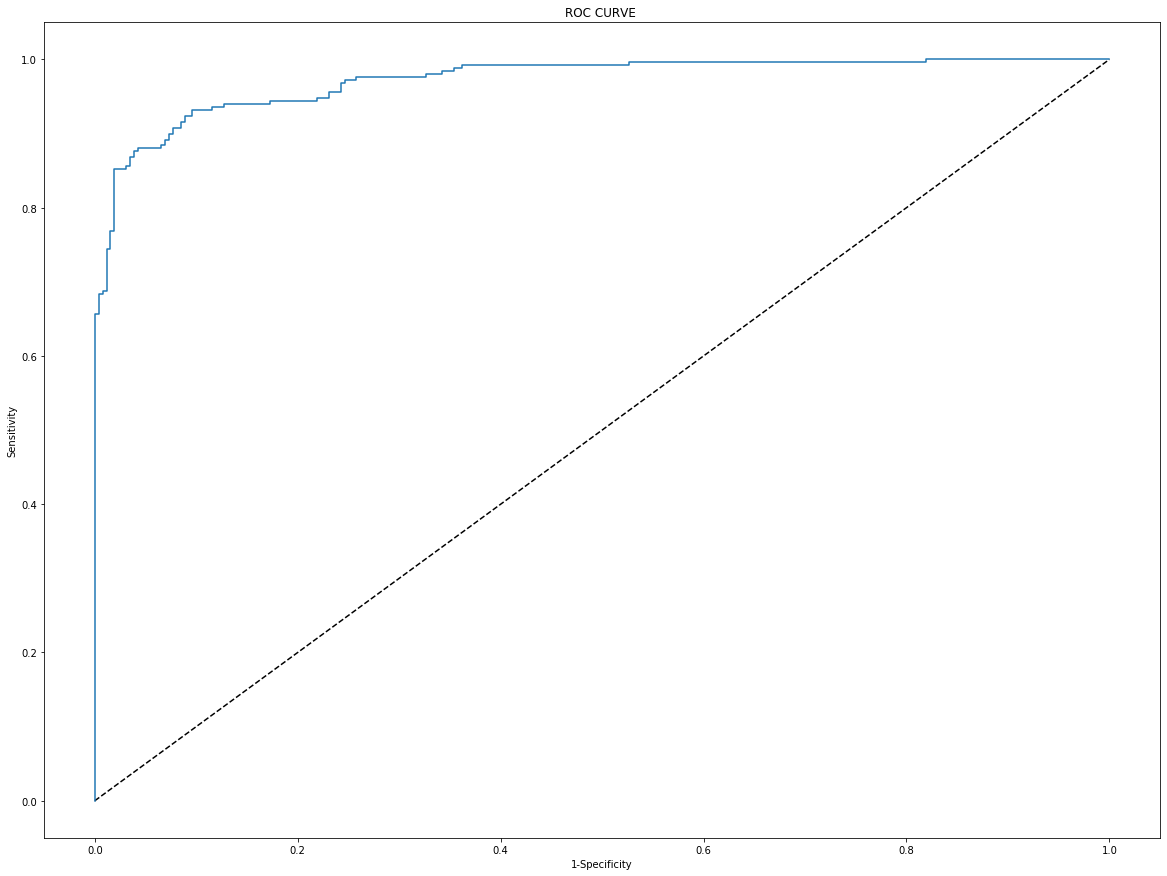

In [255]:
model = gsearch.best_estimator_

model.fit(x_train,y_train)
pred = model.predict(x_test)
print(f'accuracy score : {accuracy_score(y_test,pred)}')
print('Cross val score :',np.mean(cross_val_score(model,X,y,cv=5,scoring='accuracy')))


xgb_proba = model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,xgb_proba)      
plt.plot([0,1],[0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.plot(fpr,tpr)
plt.title('ROC CURVE ')
print('Roc_Auc_Score',roc_auc_score(y_test,pred))

In [258]:
pd.DataFrame(list(zip(y_test,pred)), columns=['True value','RF_Predicted_value'])[:20]

,True value,RF_Predicted_value
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,1


### Obseravtions
1. Random forrest performed best 

### Save model as pickle file

In [ ]:
joblib.dump(rf,'wine_quality_rf.pk')